In [2]:
import pandas as pd 
import numpy as np
import pandas_profiling as pf
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier as RFC
import sklearn.metrics as mt
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler

df=pd.read_csv('C:/Users/anuj/Documents/Anuj/MMA/Analytics For Financial Markets(823)/Team Assignment 2/Bankruptcy_data_Final.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92872 entries, 0 to 92871
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Data Year - Fiscal  92872 non-null  int64  
 1   Tobin's Q           92620 non-null  float64
 2   EPS                 92867 non-null  float64
 3   Liquidity           92625 non-null  float64
 4   Profitability       92625 non-null  float64
 5   Productivity        92625 non-null  float64
 6   Leverage Ratio      92846 non-null  float64
 7   Asset Turnover      92625 non-null  float64
 8   Operational Margin  87315 non-null  float64
 9   Return on Equity    92864 non-null  float64
 10  Market Book Ratio   92815 non-null  float64
 11  Assets Growth       86171 non-null  float64
 12  Sales Growth        86171 non-null  float64
 13  Employee Growth     85862 non-null  float64
 14  BK                  92872 non-null  int64  
dtypes: float64(13), int64(2)
memory usage: 10.6 MB


In [4]:
df.describe()

,Data Year - Fiscal,Tobin's Q,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth,BK
count,92872.000000,92620.000000,92867.000000,92625.000000,92625.000000,92625.000000,92846.000000,92625.000000,87315.000000,92864.000000,9.281500e+04,86171.000000,86171.000000,85862.000000,92872.000000
mean,2004.105888,25.369008,-14.461355,-2.631237,-29.537274,-1.222871,1.345316,1.053613,-7.915485,-2.112382,3.585063e+02,1.294077,1.900109,0.343320,0.006008
std,9.875926,902.818813,2195.467288,121.610921,677.230667,35.885556,253.038093,2.115945,214.460079,352.596902,2.606364e+04,73.769522,177.632638,14.074156,0.077280
min,1979.000000,0.009000,-384000.000000,-25968.520000,-79682.000000,-5093.000000,-7811.000000,-31.590000,-30175.700000,-88875.140000,-3.151500e+06,-1.000000,-27.431000,-1.000000,0.000000
25%,1998.000000,1.120000,-0.140000,0.020000,-0.640000,-0.060000,0.000000,0.390000,-0.030000,-0.080000,1.120000e+01,-0.053000,-0.034000,-0.048000,0.000000
50%,2006.000000,1.540000,0.330000,0.190000,0.070000,0.060000,0.280000,0.830000,0.060000,0.030000,5.828000e+01,0.052000,0.060000,0.017000,0.000000
75%,2012.000000,2.590000,1.530000,0.400000,0.310000,0.110000,0.820000,1.390000,0.140000,0.070000,2.401400e+02,0.192000,0.204000,0.131000,0.000000
max,2017.000000,194537.670000,55339.000000,1.000000,140.580000,1102.000000,75970.380000,276.380000,394.470000,39500.000000,3.455419e+06,14231.000000,39850.000000,2699.000000,1.000000


In [5]:
#pf.ProfileReport(df)

In [6]:
pd.isna(df).sum()

Data Year - Fiscal       0
Tobin's Q              252
EPS                      5
Liquidity              247
Profitability          247
Productivity           247
Leverage Ratio          26
Asset Turnover         247
Operational Margin    5557
Return on Equity         8
Market Book Ratio       57
Assets Growth         6701
Sales Growth          6701
Employee Growth       7010
BK                       0
dtype: int64

In [7]:
df=df.fillna(0)

In [8]:
pd.isna(df).sum()

Data Year - Fiscal    0
Tobin's Q             0
EPS                   0
Liquidity             0
Profitability         0
Productivity          0
Leverage Ratio        0
Asset Turnover        0
Operational Margin    0
Return on Equity      0
Market Book Ratio     0
Assets Growth         0
Sales Growth          0
Employee Growth       0
BK                    0
dtype: int64

In [9]:
df1=df.drop(['Data Year - Fiscal'],axis=1)

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92872 entries, 0 to 92871
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Tobin's Q           92872 non-null  float64
 1   EPS                 92872 non-null  float64
 2   Liquidity           92872 non-null  float64
 3   Profitability       92872 non-null  float64
 4   Productivity        92872 non-null  float64
 5   Leverage Ratio      92872 non-null  float64
 6   Asset Turnover      92872 non-null  float64
 7   Operational Margin  92872 non-null  float64
 8   Return on Equity    92872 non-null  float64
 9   Market Book Ratio   92872 non-null  float64
 10  Assets Growth       92872 non-null  float64
 11  Sales Growth        92872 non-null  float64
 12  Employee Growth     92872 non-null  float64
 13  BK                  92872 non-null  int64  
dtypes: float64(13), int64(1)
memory usage: 9.9 MB


In [10]:
df1

,Tobin's Q,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth,BK
0,0.980,1.580,0.360,0.180,0.130,1.330,1.770,0.070,0.150,2.220,0.000,0.000,0.000,0
1,0.980,1.410,0.360,0.190,0.120,1.310,1.590,0.070,0.130,2.410,0.126,0.014,0.040,0
2,0.870,0.310,0.320,0.130,0.080,1.030,1.550,0.050,0.040,2.560,0.368,0.328,0.567,0
3,1.130,0.710,0.280,0.140,0.080,0.800,1.390,0.060,0.050,5.280,-0.021,-0.119,-0.096,0
4,1.260,0.750,0.410,0.130,0.080,0.200,1.300,0.060,0.040,8.680,0.233,0.147,0.053,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92867,1.521,-1.488,-0.015,-0.759,-0.057,-1042.105,0.174,-0.327,-6.614,-1.847,-0.073,-0.557,-0.077,0
92868,1.988,-1.808,0.094,-1.205,-0.121,-4.530,0.216,-0.561,-4.519,-2.475,-0.202,-0.011,-0.208,0
92869,0.924,-0.016,0.039,0.000,-0.082,0.745,0.254,-0.324,-0.569,3274.506,-0.168,-0.020,-0.105,0
92870,0.788,-0.133,0.054,-0.029,0.001,0.575,0.196,0.005,-0.086,36.475,0.077,-0.171,-0.059,0


In [11]:
df1.head()

,Tobin's Q,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth,BK
0,0.98,1.58,0.36,0.18,0.13,1.33,1.77,0.07,0.15,2.22,0.000,0.000,0.000,0
1,0.98,1.41,0.36,0.19,0.12,1.31,1.59,0.07,0.13,2.41,0.126,0.014,0.040,0
2,0.87,0.31,0.32,0.13,0.08,1.03,1.55,0.05,0.04,2.56,0.368,0.328,0.567,0
3,1.13,0.71,0.28,0.14,0.08,0.80,1.39,0.06,0.05,5.28,-0.021,-0.119,-0.096,0
4,1.26,0.75,0.41,0.13,0.08,0.20,1.30,0.06,0.04,8.68,0.233,0.147,0.053,0


In [12]:
df1['BK'].value_counts()

0    92314
1      558
Name: BK, dtype: int64

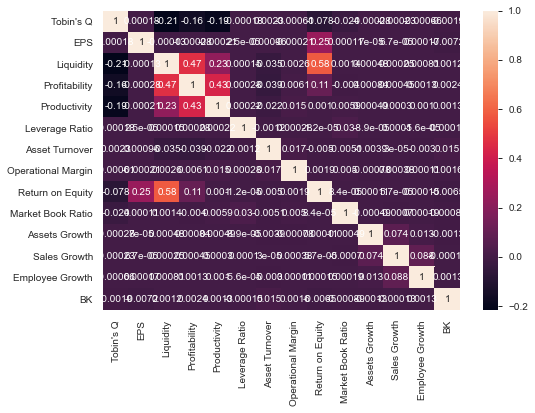

In [13]:
corrmat=df1.corr(method='pearson')

sn.heatmap(corrmat,annot=True)

plt.show()

In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92872 entries, 0 to 92871
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Tobin's Q           92872 non-null  float64
 1   EPS                 92872 non-null  float64
 2   Liquidity           92872 non-null  float64
 3   Profitability       92872 non-null  float64
 4   Productivity        92872 non-null  float64
 5   Leverage Ratio      92872 non-null  float64
 6   Asset Turnover      92872 non-null  float64
 7   Operational Margin  92872 non-null  float64
 8   Return on Equity    92872 non-null  float64
 9   Market Book Ratio   92872 non-null  float64
 10  Assets Growth       92872 non-null  float64
 11  Sales Growth        92872 non-null  float64
 12  Employee Growth     92872 non-null  float64
 13  BK                  92872 non-null  int64  
dtypes: float64(13), int64(1)
memory usage: 9.9 MB


In [15]:
df1_features=df1.iloc[:,0:13]

df1_target=df1.iloc[:,13]

In [16]:
#Comapring the data after replacing with mean values
df1_features.describe()

,Tobin's Q,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth
count,92872.000000,92872.000000,92872.000000,92872.000000,92872.000000,92872.000000,92872.000000,92872.000000,92872.000000,9.287200e+04,92872.000000,92872.000000,92872.000000
mean,25.300171,-14.460577,-2.624239,-29.458717,-1.219618,1.344940,1.050811,-7.441862,-2.112200,3.582862e+02,1.200705,1.763011,0.317407
std,901.594073,2195.408189,121.449170,676.331196,35.837859,253.002671,2.113826,207.953408,352.581716,2.605564e+04,71.059112,171.104938,13.532874
min,0.000000,-384000.000000,-25968.520000,-79682.000000,-5093.000000,-7811.000000,-31.590000,-30175.700000,-88875.140000,-3.151500e+06,-1.000000,-27.431000,-1.000000
25%,1.120000,-0.140000,0.020000,-0.630000,-0.060000,0.000000,0.380000,-0.020000,-0.080000,1.116000e+01,-0.041000,-0.021000,-0.039000
50%,1.540000,0.330000,0.190000,0.070000,0.060000,0.280000,0.820000,0.060000,0.030000,5.817000e+01,0.037000,0.044000,0.003000
75%,2.580000,1.530000,0.400000,0.310000,0.110000,0.820000,1.380000,0.130000,0.070000,2.400150e+02,0.175000,0.187000,0.116000
max,194537.670000,55339.000000,1.000000,140.580000,1102.000000,75970.380000,276.380000,394.470000,39500.000000,3.455419e+06,14231.000000,39850.000000,2699.000000


In [17]:
#Comapring the data after replacing with mean values
df.describe()

,Data Year - Fiscal,Tobin's Q,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth,BK
count,92872.000000,92872.000000,92872.000000,92872.000000,92872.000000,92872.000000,92872.000000,92872.000000,92872.000000,92872.000000,9.287200e+04,92872.000000,92872.000000,92872.000000,92872.000000
mean,2004.105888,25.300171,-14.460577,-2.624239,-29.458717,-1.219618,1.344940,1.050811,-7.441862,-2.112200,3.582862e+02,1.200705,1.763011,0.317407,0.006008
std,9.875926,901.594073,2195.408189,121.449170,676.331196,35.837859,253.002671,2.113826,207.953408,352.581716,2.605564e+04,71.059112,171.104938,13.532874,0.077280
min,1979.000000,0.000000,-384000.000000,-25968.520000,-79682.000000,-5093.000000,-7811.000000,-31.590000,-30175.700000,-88875.140000,-3.151500e+06,-1.000000,-27.431000,-1.000000,0.000000
25%,1998.000000,1.120000,-0.140000,0.020000,-0.630000,-0.060000,0.000000,0.380000,-0.020000,-0.080000,1.116000e+01,-0.041000,-0.021000,-0.039000,0.000000
50%,2006.000000,1.540000,0.330000,0.190000,0.070000,0.060000,0.280000,0.820000,0.060000,0.030000,5.817000e+01,0.037000,0.044000,0.003000,0.000000
75%,2012.000000,2.580000,1.530000,0.400000,0.310000,0.110000,0.820000,1.380000,0.130000,0.070000,2.400150e+02,0.175000,0.187000,0.116000,0.000000
max,2017.000000,194537.670000,55339.000000,1.000000,140.580000,1102.000000,75970.380000,276.380000,394.470000,39500.000000,3.455419e+06,14231.000000,39850.000000,2699.000000,1.000000


In [18]:
df1_target.value_counts()

0    92314
1      558
Name: BK, dtype: int64

In [19]:

# Split the data into training and testing sets

train_features, test_features, train_target, test_target = train_test_split(df1_features, df1_target, test_size = 0.25,random_state=42,stratify=df1['BK'].values)


In [20]:
(train_features_new).info()

NameError: name 'train_features_new' is not defined

In [21]:
#SMOTE sampling

#sm = SMOTE(random_state = 42)

#train_features_new, train_target_new = sm.fit_sample(train_features, train_target.ravel())

In [22]:
#Downsampling 


rus = RandomUnderSampler(random_state=42,replacement=False)
train_features_new, train_target_new = rus.fit_resample(train_features, train_target)

In [23]:
pd.Series(train_target_new).value_counts()

1    419
0    419
Name: BK, dtype: int64

In [ ]:


#scaler=StandardScaler()

#train_features_new=scaler.fit_transform(train_features_new)

#test_features=scaler.fit_transform(test_features)

In [23]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 5, stop = 50, num = 10)]
# Number of features to consider at every split
max_features = ['auto']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 20, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 3, 4]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
'max_features': max_features,
'max_depth': max_depth,
'min_samples_split': min_samples_split,
'min_samples_leaf': min_samples_leaf,
'bootstrap': bootstrap}

print(random_grid)


{'n_estimators': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50], 'max_features': ['auto'], 'max_depth': [10, 12, 15, 17, 20, None], 'min_samples_split': [2, 3, 4], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True]}


In [24]:
# Use the GridSearch to search for best hyperparameters

rf_model = RFC(random_state=42)

rf = GridSearchCV(rf_model,random_grid, cv=3,verbose=10,scoring='roc_auc',n_jobs=-1)

# Fit the random search model
rf.fit(train_features_new, train_target_new)

Fitting 3 folds for each of 540 candidates, totalling 1620 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   50.2s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   54.5s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:  2

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True],
                         'max_depth': [10, 12, 15, 17, 20, None],
                         'max_features': ['auto'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [5, 10, 15, 20, 25, 30, 35, 40, 45,
                                          50]},
             scoring='roc_auc', verbose=10)

In [25]:
rf.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 50}

In [26]:
rf.best_estimator_

RandomForestClassifier(max_depth=10, min_samples_split=4, n_estimators=50,
                       random_state=42)

In [27]:
rf_pred=rf.predict(test_features)

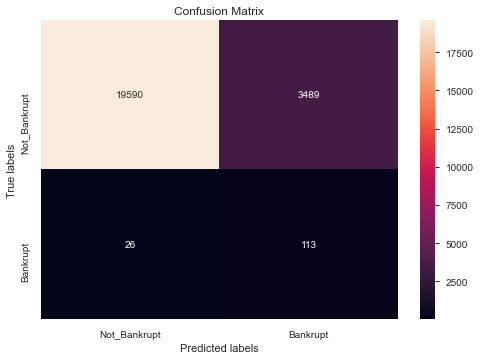

In [28]:
cm_rf=mt.confusion_matrix(test_target,rf_pred,labels=[0,1])

#Bakrupt:1, Not_Bankrupt:0
ax= plt.subplot() 
sn.heatmap(cm_rf, annot=True, ax = ax,fmt='g'); #annot=True to annotate cells 
# labels, title and ticks 
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Not_Bankrupt', 'Bankrupt']); 
ax.yaxis.set_ticklabels(['Not_Bankrupt', 'Bankrupt']);

In [29]:
mt.roc_auc_score(test_target,rf_pred)

0.8308866230816205

In [30]:
mt.f1_score(test_target,rf_pred)

0.06041165463779738

In [31]:
mt.precision_score(test_target,rf_pred)

0.031371460299833426

In [32]:
mt.recall_score(test_target,rf_pred)

0.8129496402877698

In [33]:
# Defining SVM hyperparameter range
svm_grid = {'C': [0.1, 1, 10, 20, 90,100,120], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
svm_model=SVC(random_state=42)  
svm = GridSearchCV(svm_model, svm_grid, refit = True, verbose = 10,n_jobs=-1,scoring='roc_auc')
  
# fitting the model for grid search
svm.fit(train_features_new, train_target_new)

Fitting 5 folds for each of 35 candidates, totalling 175 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   17.1s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   21.6s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   34.0s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   41.7s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   49.5s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   59.9s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 175 out of 175 | elapsed:  1

GridSearchCV(estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 20, 90, 100, 120],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=10)

In [34]:
svm.best_params_ 

{'C': 90, 'gamma': 0.001, 'kernel': 'rbf'}

In [35]:
svm.best_estimator_

SVC(C=90, gamma=0.001, random_state=42)

In [36]:
svm_predictions=svm.predict(test_features)

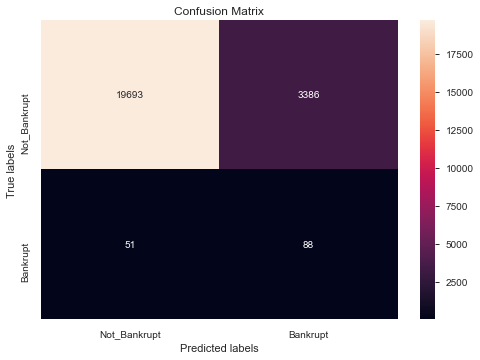

In [37]:
cm_svm=mt.confusion_matrix(test_target,svm_predictions,labels=[0,1])

#Bankrupt:1, Not_Bankrupt:0
ax= plt.subplot() 
sn.heatmap(cm_svm, annot=True, ax = ax,fmt='g'); #annot=True to annotate cells 
# labels, title and ticks 
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Not_Bankrupt', 'Bankrupt']); 
ax.yaxis.set_ticklabels(['Not_Bankrupt', 'Bankrupt']);



In [38]:
mt.roc_auc_score(test_target,svm_predictions)

0.7431900313624052

In [39]:
mt.f1_score(test_target,svm_predictions)

0.04871298090229726

In [40]:
mt.precision_score(test_target,svm_predictions)

0.025331030512377662

In [41]:
mt.recall_score(test_target,svm_predictions)

0.6330935251798561

In [24]:
#Logistic Regression

from sklearn.linear_model import LogisticRegressionCV

lr = LogisticRegressionCV(n_jobs=-1,verbose=10,max_iter=100,cv=3,Cs=10,scoring='roc_auc')
lr.fit(train_features_new, train_target_new)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  4.6min finished
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  4.6min remaining:    0.0s
C:\Users\anuj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegressionCV(cv=3, n_jobs=-1, scoring='roc_auc', verbose=10)

In [25]:
lr_predict = lr.predict(test_features)

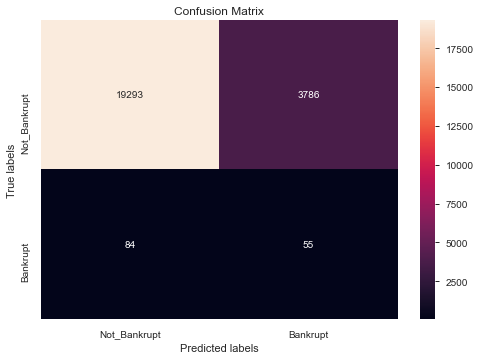

In [26]:
cm_lr=mt.confusion_matrix(test_target,lr_predict,labels=[0,1])

#Bankrupt:1, Not_Bankrupt:0
ax= plt.subplot() 
sn.heatmap(cm_lr, annot=True, ax = ax,fmt='g'); #annot=True to annotate cells 
# labels, title and ticks 
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Not_Bankrupt', 'Bankrupt']); 
ax.yaxis.set_ticklabels(['Not_Bankrupt', 'Bankrupt']);


In [27]:
mt.roc_auc_score(test_target,lr_predict)

0.6158191086543218

In [28]:
mt.f1_score(test_target,lr_predict)

0.027638190954773868

In [29]:
mt.precision_score(test_target,lr_predict)

0.014319187711533454

In [30]:
mt.recall_score(test_target,lr_predict)

0.39568345323741005